In [1]:
import frontmatter
from collections import defaultdict
from pathlib import Path
import git
from datetime import date
import matplotlib.pyplot as plt

plt.style.use("science")
plt.style.use("notebook")
# plt.style.use('fivethirtyeight')

In [2]:
educator_keys = [
    "mentor",
    "instructor",
    "author",
    "facilitator",
    "material",  # deprecated for author
]

educator_key_mapping = {"material": "author"}

In [3]:
repo = git.Repo("/Users/fuchur/Documents/23/git_sync/hsf.github.io/")

In [4]:
path = "_profiles"

educator_counts = defaultdict(list)
times = []

for commit in repo.iter_commits(paths=path):
    try:
        traversable = (commit.tree / "_profiles").traverse()
    except (KeyError, IndexError, ValueError):
        continue
    try:
        educator_count = defaultdict(int)
        for entry in traversable:
            content = repo.git.show("{}:{}".format(commit.hexsha, entry.path))
            try:
                dct = frontmatter.loads(content)
            except Exception as e:  # ParserError, where are you defined? ;)
                print(e)
                continue
            keys = dct.get("training_roles", [])
            if keys is None:
                continue
            roles = [r.casefold() for r in keys]
            for k in educator_keys:
                if k in roles:
                    educator_count[educator_key_mapping.get(k, k)] += 1
                else:
                    # ensure key is present
                    educator_count[educator_key_mapping.get(k, k)] += 0
            if roles:
                educator_count["all"] += 1
        print(commit, educator_count)
        for k, v in educator_count.items():
            educator_counts[k].append(v)
        times.append(commit.authored_date)
    except IndexError:
        continue

e9ef529ae5109e54dc1941bce9937f363db4431e defaultdict(<class 'int'>, {'mentor': 49, 'instructor': 37, 'author': 19, 'facilitator': 15, 'all': 64})
de4507b4f1de80646df9fc56c7347f727f79d82d defaultdict(<class 'int'>, {'mentor': 49, 'instructor': 37, 'author': 18, 'facilitator': 15, 'all': 63})
ec508cfcacd5d1df3ad813d9def90f8bf11c424b defaultdict(<class 'int'>, {'mentor': 48, 'instructor': 37, 'author': 18, 'facilitator': 15, 'all': 62})
ebc44e4b9f92946ec3f23e5c6029e08301028d17 defaultdict(<class 'int'>, {'mentor': 46, 'instructor': 37, 'author': 18, 'facilitator': 15, 'all': 60})
d6b6c0e0a45bbea5b21518617b70c83af15e6ac3 defaultdict(<class 'int'>, {'mentor': 45, 'instructor': 37, 'author': 18, 'facilitator': 15, 'all': 59})
893732142164c76ac62b53f3f10280b318eacddf defaultdict(<class 'int'>, {'mentor': 45, 'instructor': 37, 'author': 17, 'facilitator': 15, 'all': 58})
0b004de7f6cfd98acc1906021c047241ee2a16df defaultdict(<class 'int'>, {'mentor': 44, 'instructor': 37, 'author': 17, 'facilita

In [5]:
educator_counts

defaultdict(list,
            {'mentor': [49,
              49,
              48,
              46,
              45,
              45,
              44,
              44,
              44,
              43,
              42,
              42,
              37,
              36,
              36,
              36,
              36,
              36,
              36,
              36,
              36,
              35,
              35,
              35,
              35,
              34,
              34,
              34,
              34,
              34,
              33,
              32,
              32,
              30,
              30,
              30,
              29,
              28,
              19,
              19,
              19,
              16,
              15,
              15,
              15,
              15,
              15,
              14,
              14,
              13],
             'instructor': [37,
              37,
              37,
   

In [6]:
dt_times = [date.fromtimestamp(t) for t in times]

mentor [49, 49, 48, 46, 45, 45, 44, 44, 44, 43, 42, 42, 37, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 34, 34, 33, 32, 32, 30, 30, 30, 29, 28, 19, 19, 19, 16, 15, 15, 15, 15, 15, 14, 14, 13]
instructor [37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 33, 32, 32, 32, 31, 31, 31, 30, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 27, 26, 25, 22, 22, 21, 21, 21, 18, 18, 16, 16, 15, 15, 15, 15, 14, 14, 14, 13]
author [19, 18, 18, 18, 18, 17, 17, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
facilitator [15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 12, 12, 11, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


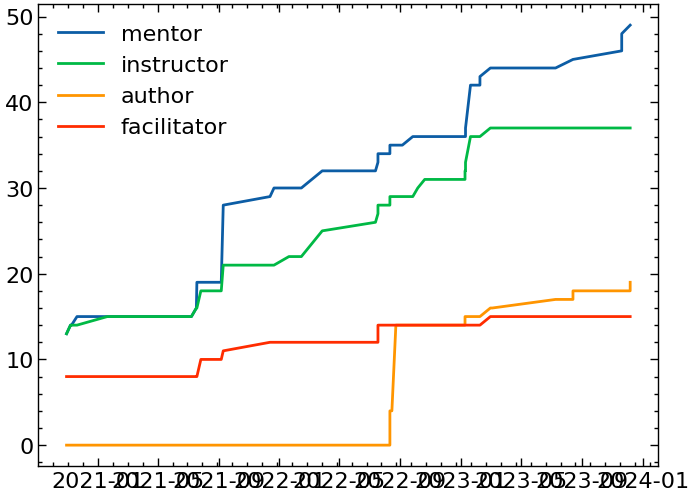

In [7]:
_, ax = plt.subplots()

for k, vs in educator_counts.items():
    if k == "all":
        continue
    print(k, vs)
    ax.plot(dt_times, vs, label=k)
ax.legend(frameon=False)

In [8]:
import pandas as pd

data_dir = Path(".").resolve().parent / "data"
assert data_dir.is_dir()

pd.Series(educator_counts["all"], index=dt_times).to_csv(
    data_dir / "total_educators.csv"
)